## **Instalação e importação de bibliotecas e dos dados**

In [1]:
!pip install sweetviz
!pip install XlsxWriter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.1 MB 7.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 149 kB 4.1 MB/s 


In [2]:
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import sweetviz as sv
import numpy as np;
import plotly.express as px;

In [3]:
url = ('https://github.com/isabela-rossetti/mkt/blob/main/marketing_campaign1.xlsx?raw=true')
dados =  pd.read_excel(url)
dados

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,14,...,1,3,6,0,0,0,0,0,0,0
2054,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,...,3,4,5,0,0,0,0,0,0,0
2055,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,...,3,13,6,0,1,0,0,0,0,0
2056,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,...,5,10,3,0,0,0,0,0,0,0


## **Análise exploratória dos dados**

In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2058 non-null   int64  
 1   Education            2058 non-null   object 
 2   Marital_Status       2058 non-null   object 
 3   Income               2034 non-null   float64
 4   Kidhome              2058 non-null   int64  
 5   Teenhome             2058 non-null   int64  
 6   Dt_Customer          2058 non-null   object 
 7   Recency              2058 non-null   int64  
 8   MntWines             2058 non-null   int64  
 9   MntFruits            2058 non-null   int64  
 10  MntMeatProducts      2058 non-null   int64  
 11  MntFishProducts      2058 non-null   int64  
 12  MntSweetProducts     2058 non-null   int64  
 13  MntGoldProds         2058 non-null   int64  
 14  NumDealsPurchases    2058 non-null   int64  
 15  NumWebPurchases      2058 non-null   i

                                             |          | [  0%]   00:00 -> (? left)


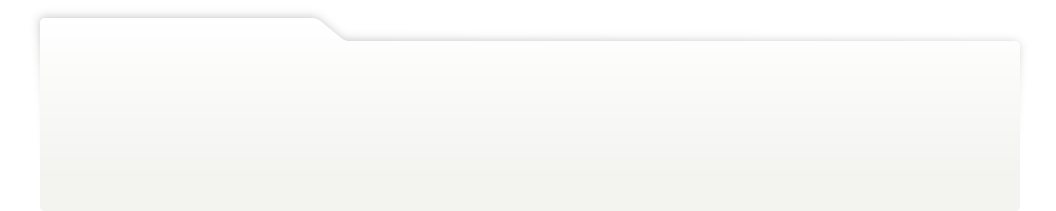
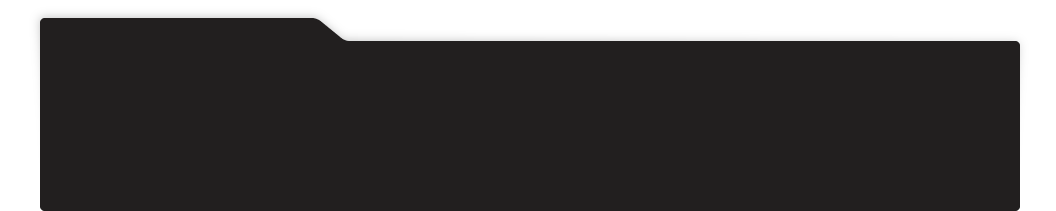
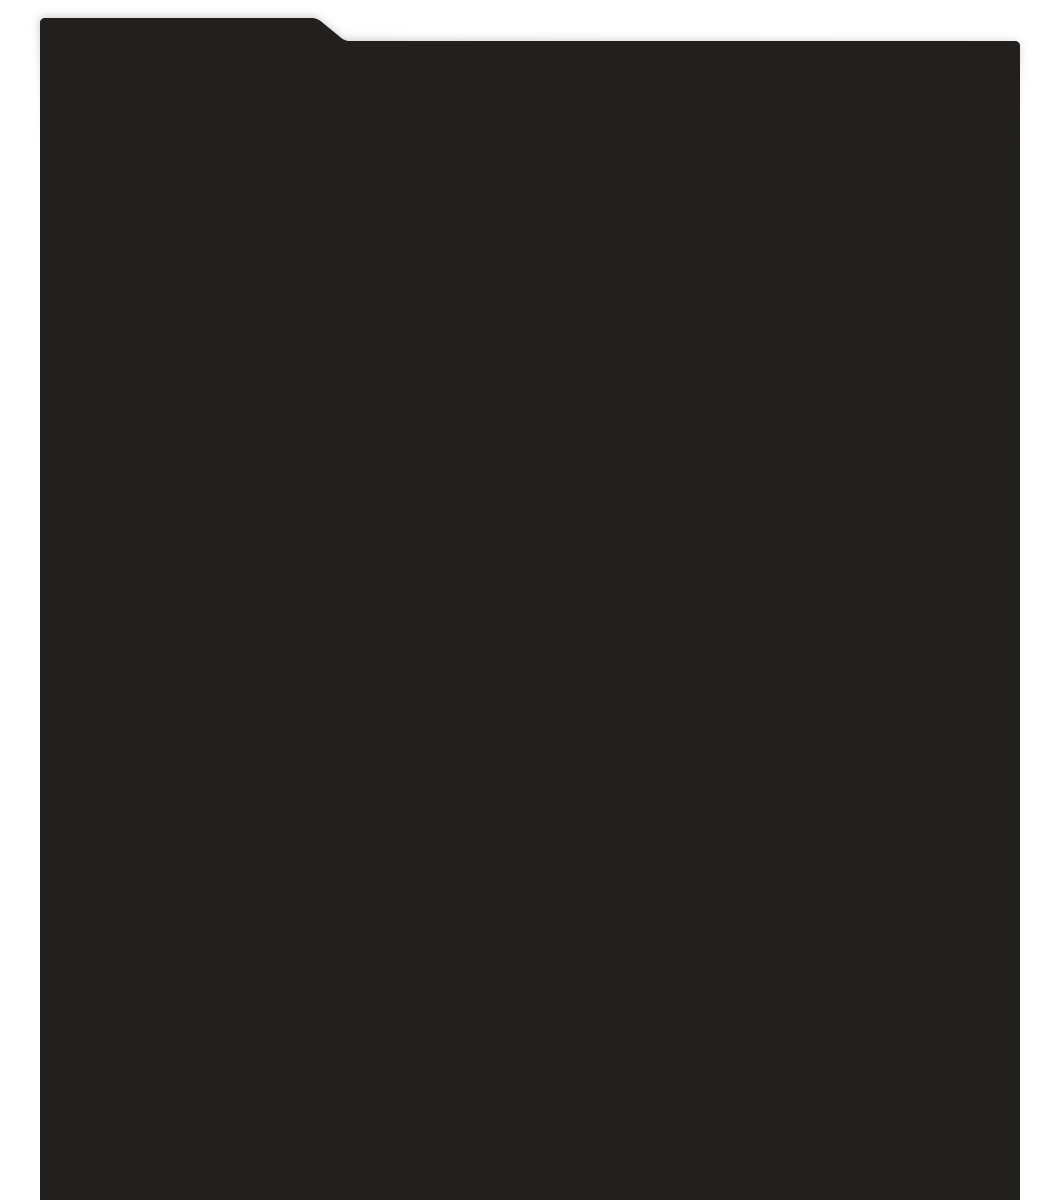
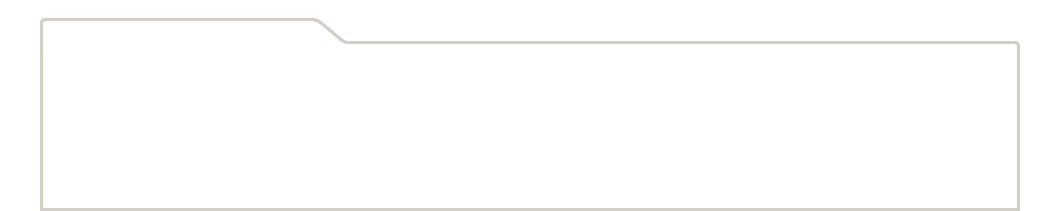
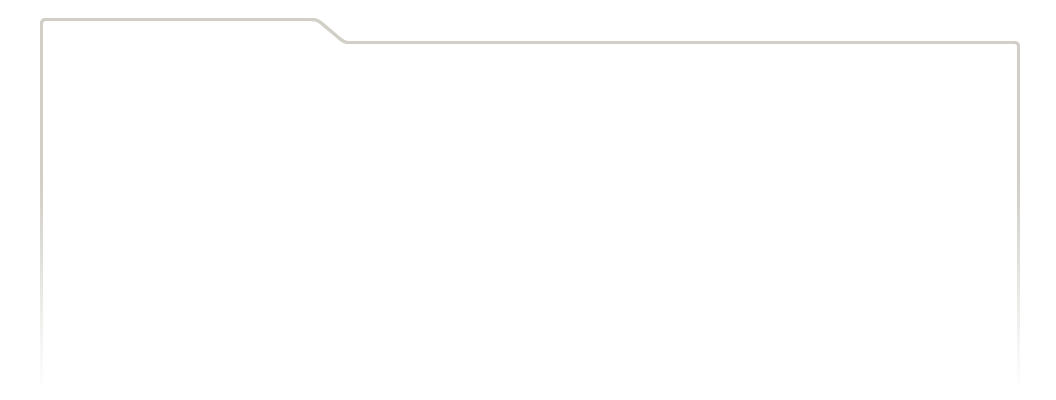
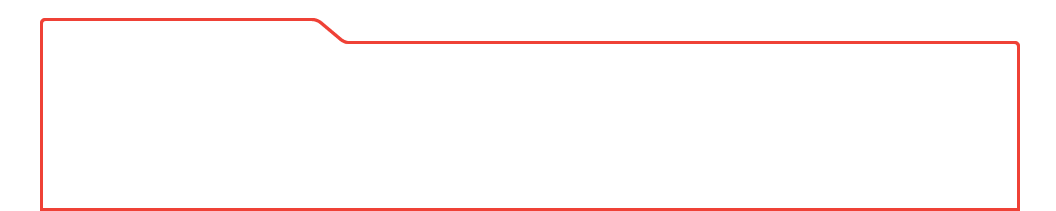
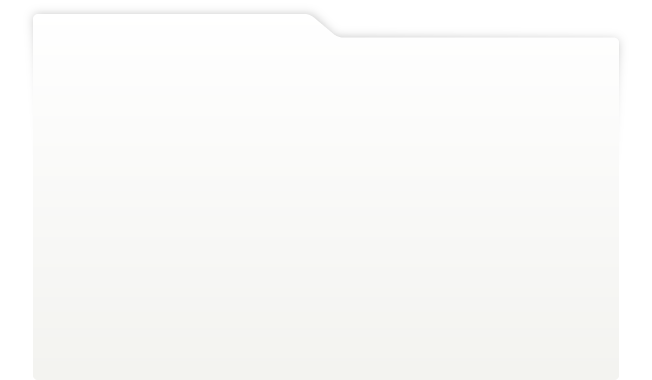
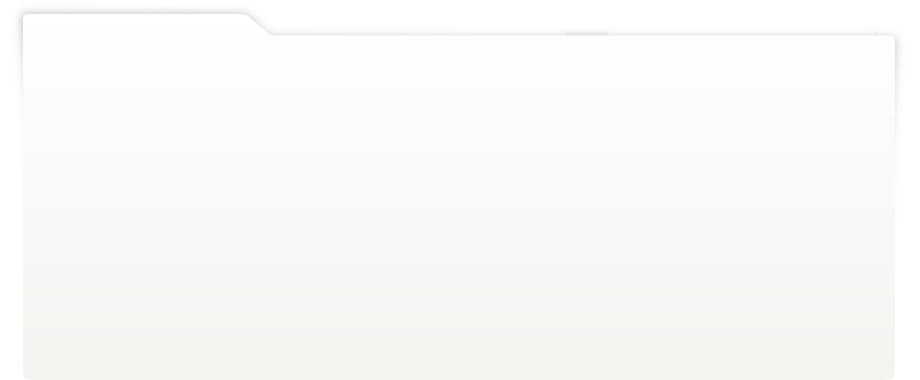
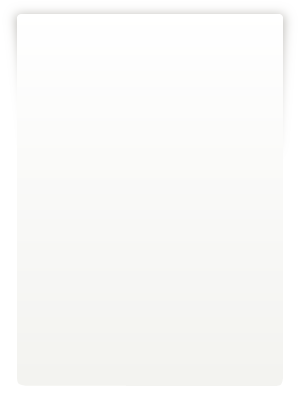
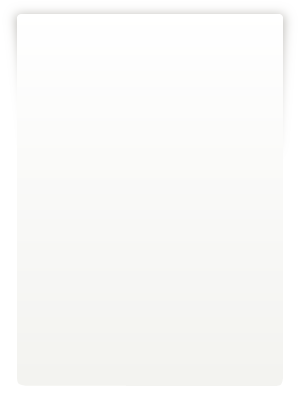
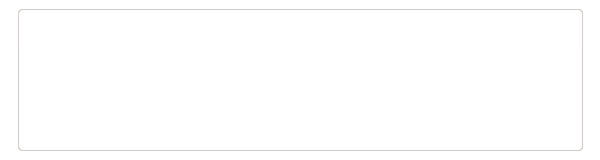
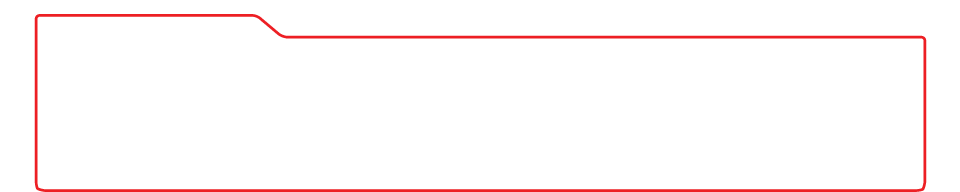
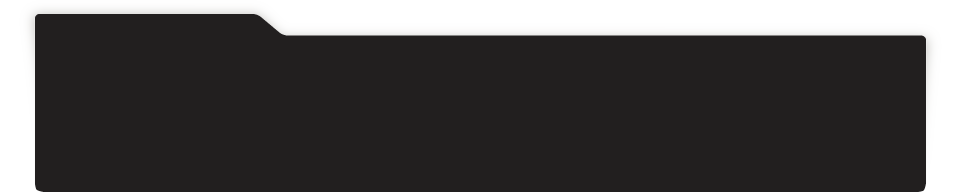
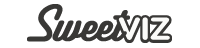
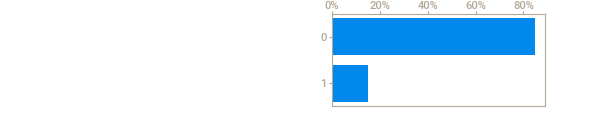
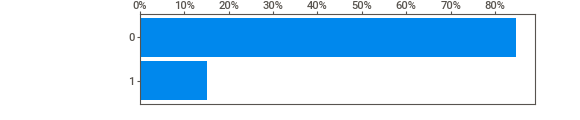
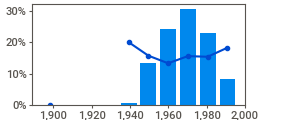
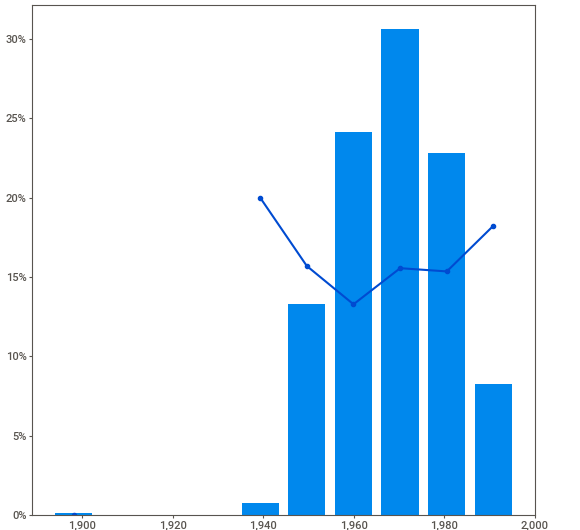
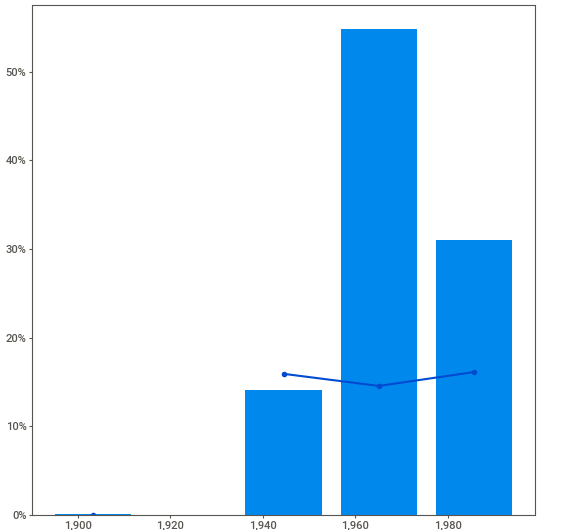
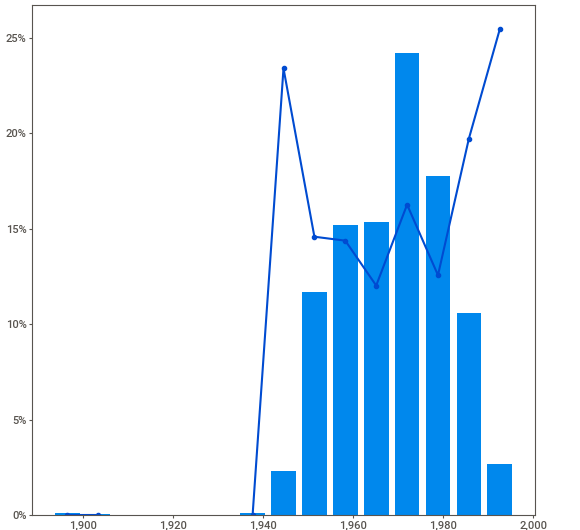
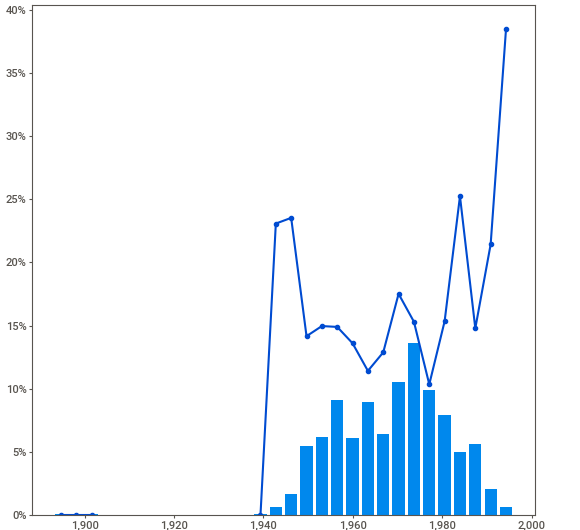
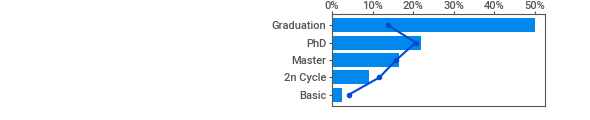
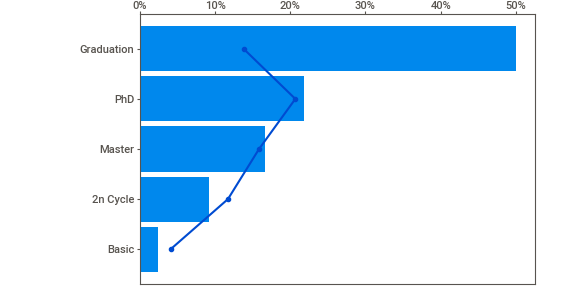
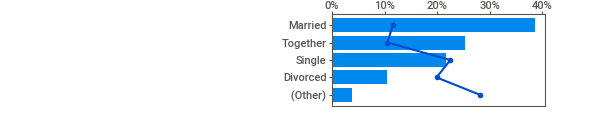
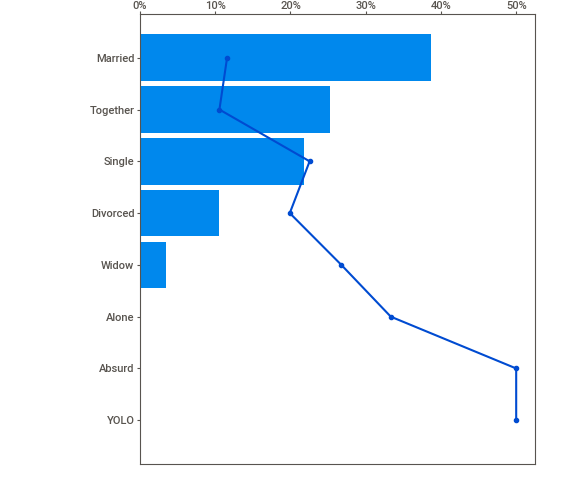
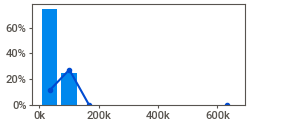
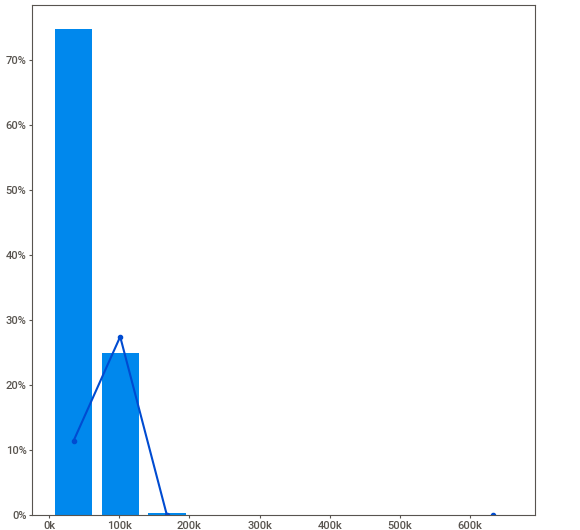
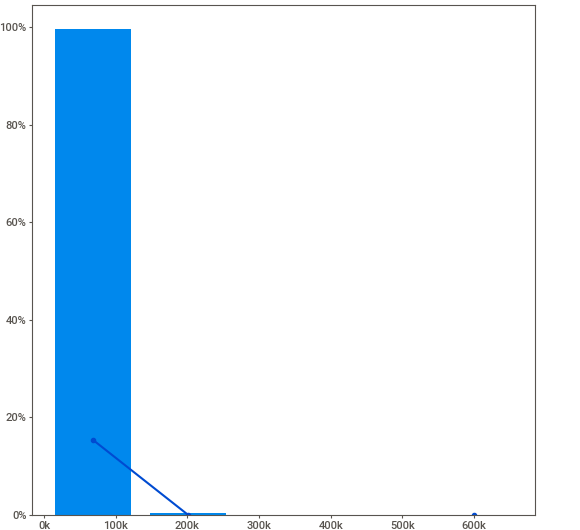
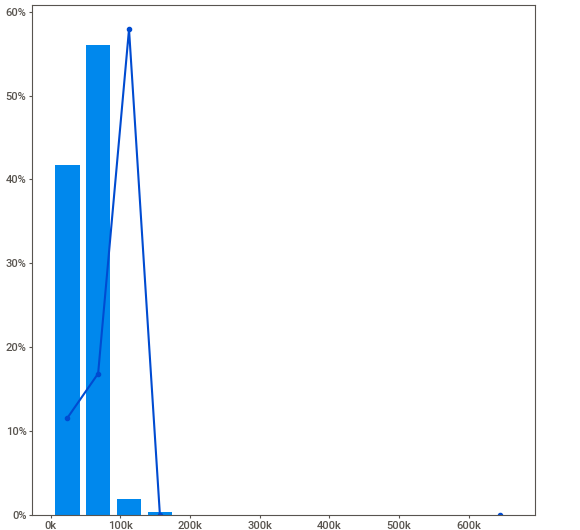
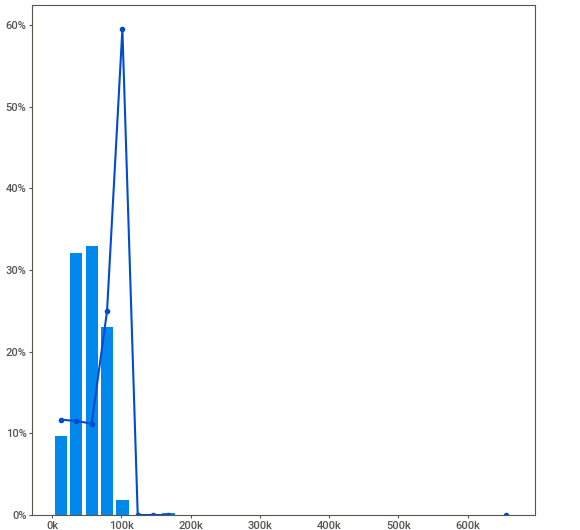
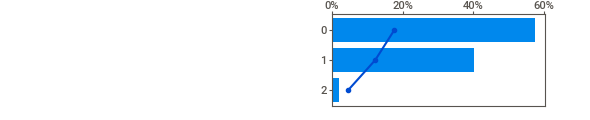
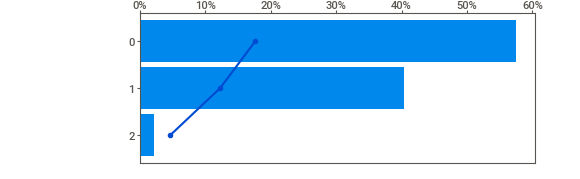
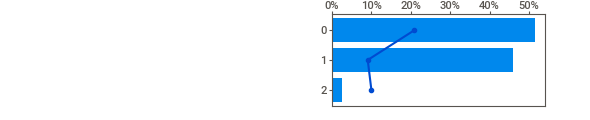
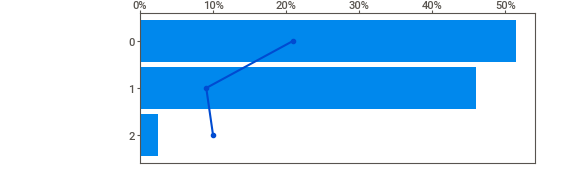
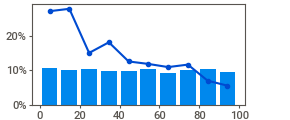
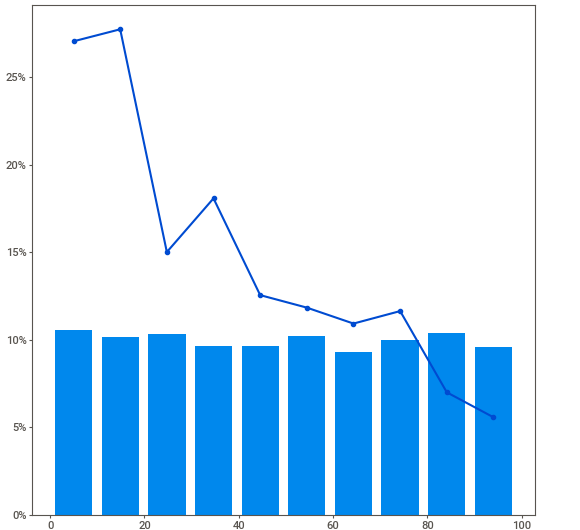
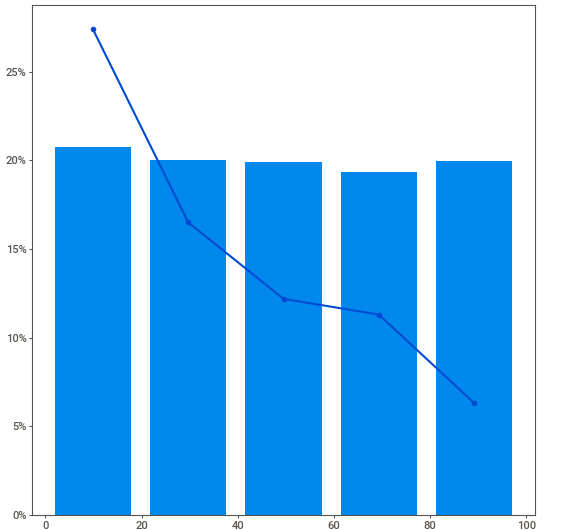
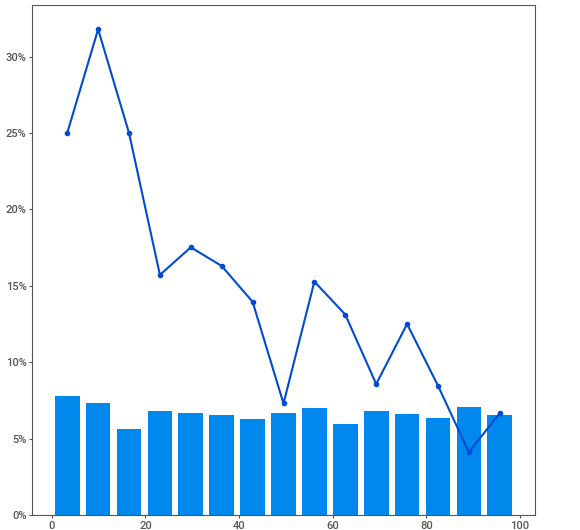
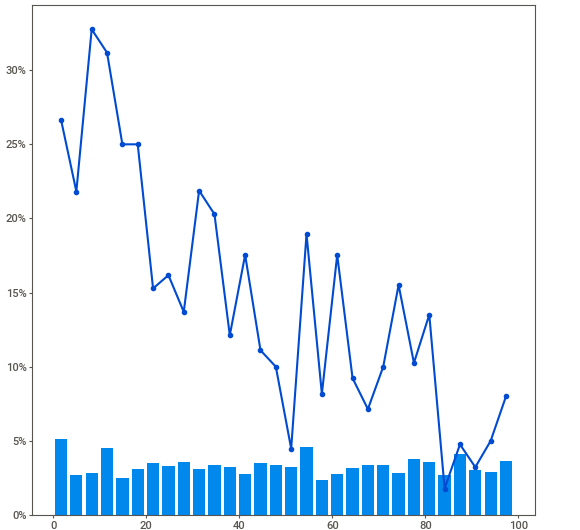
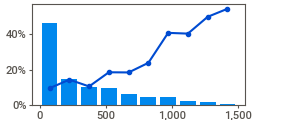
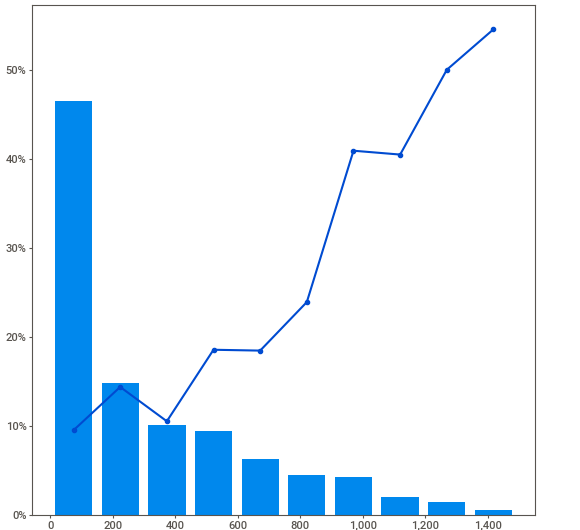
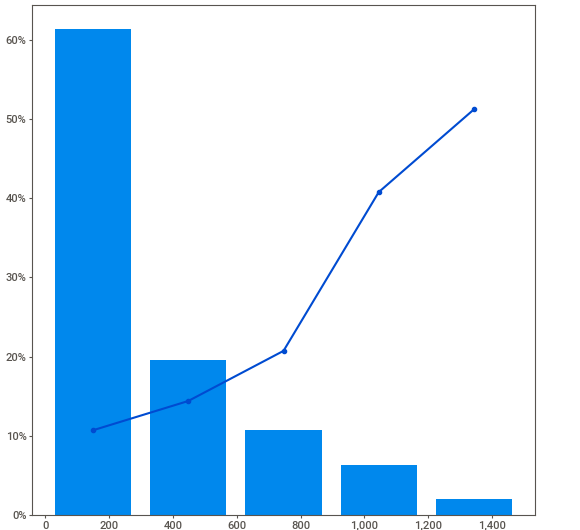
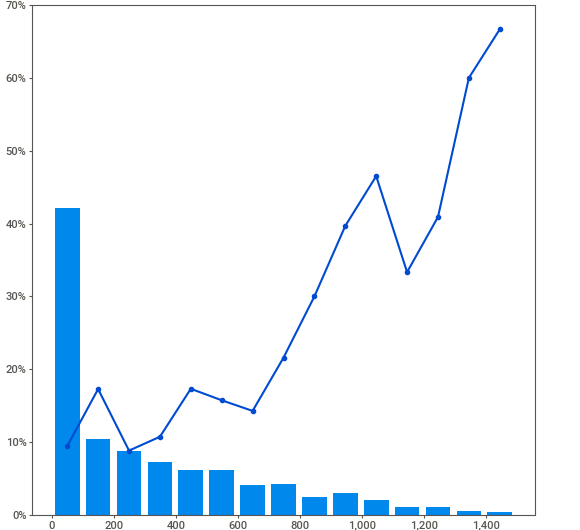
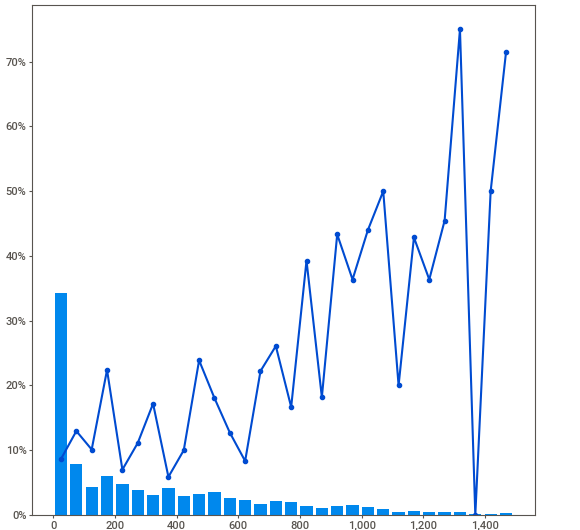
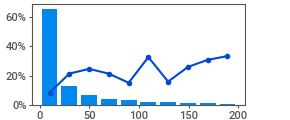
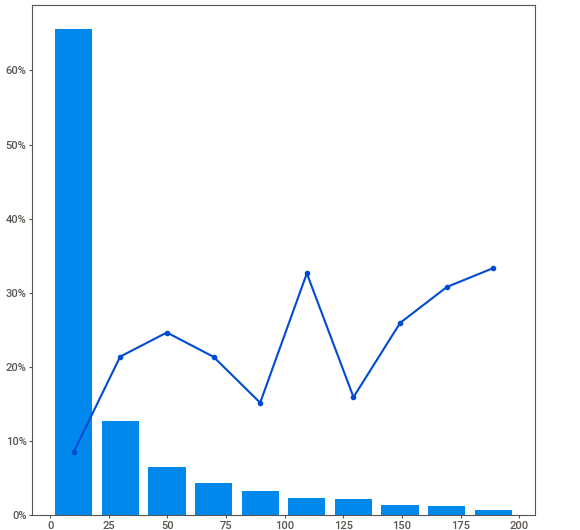
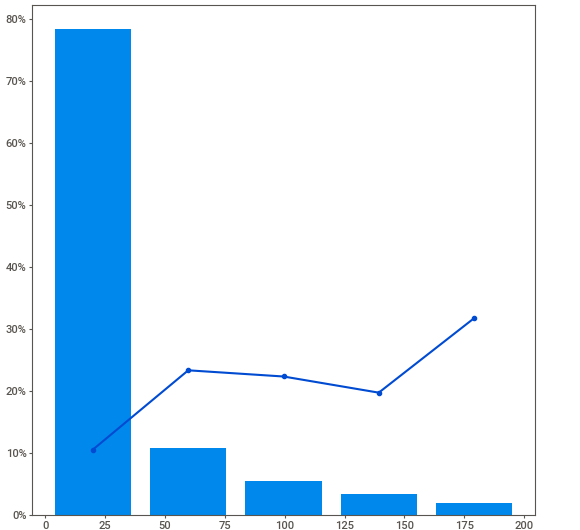
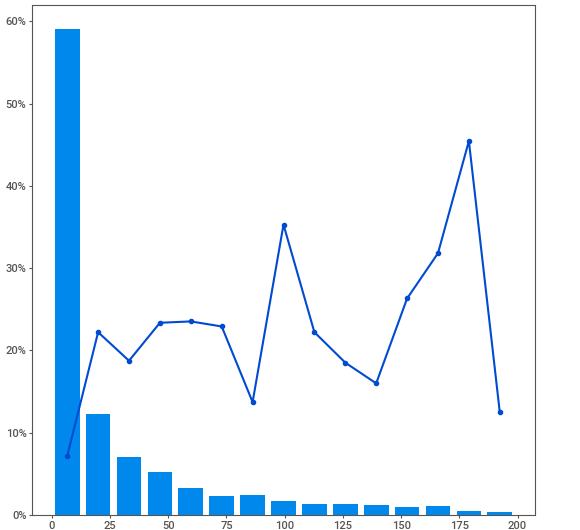
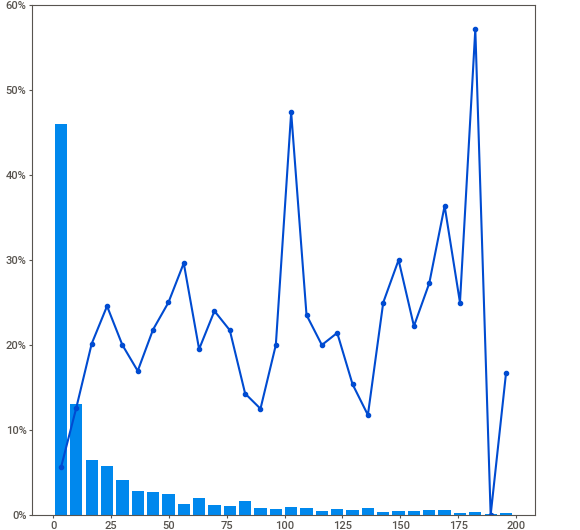
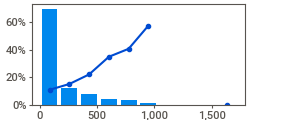
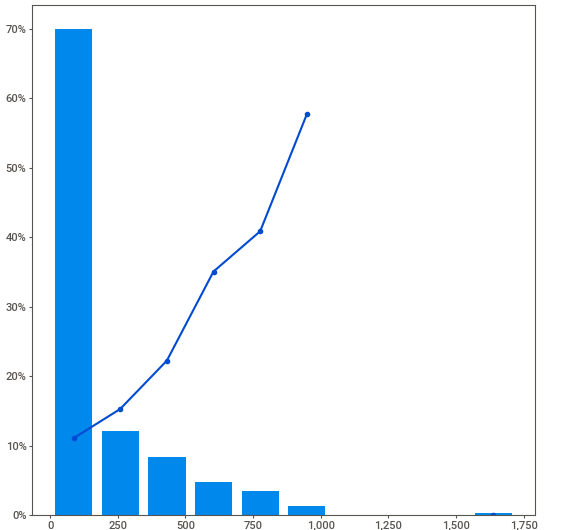
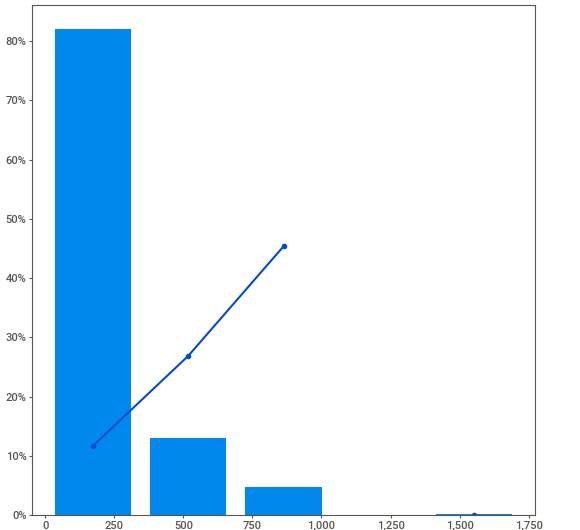
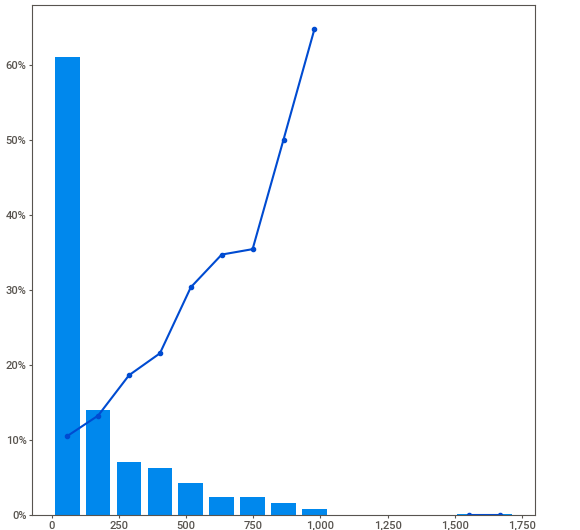
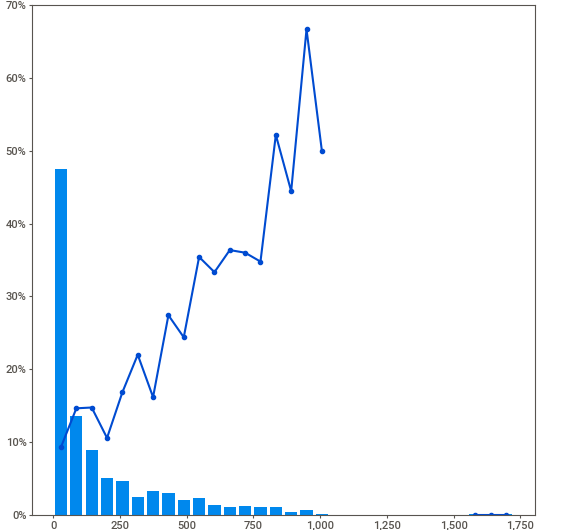
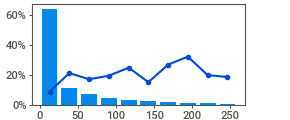
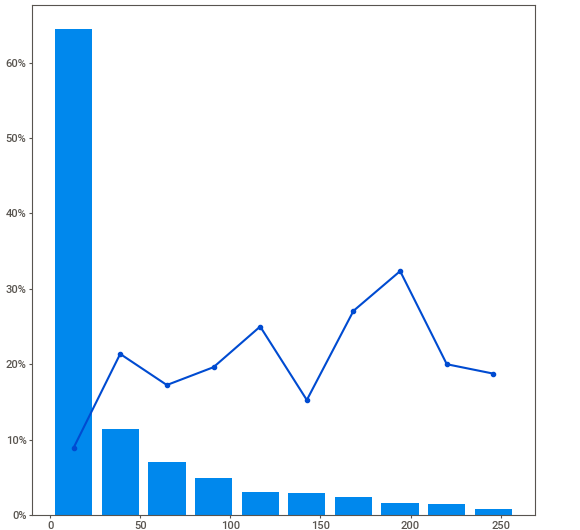
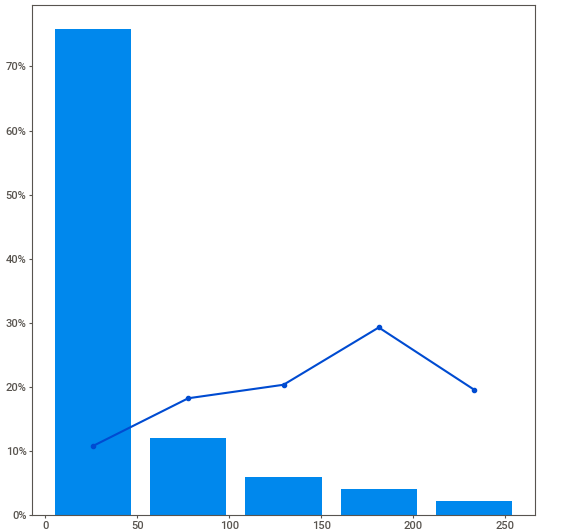
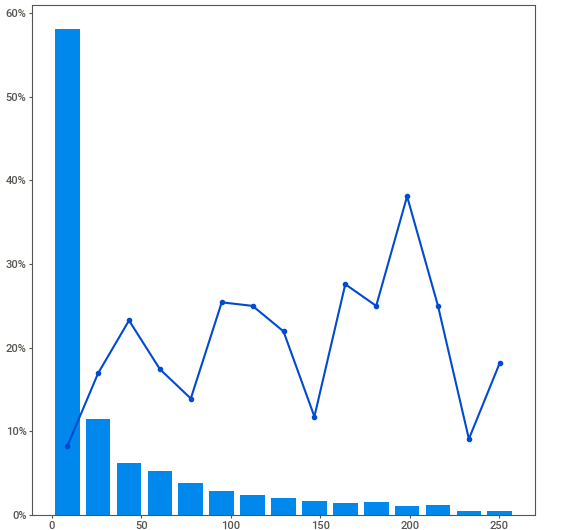
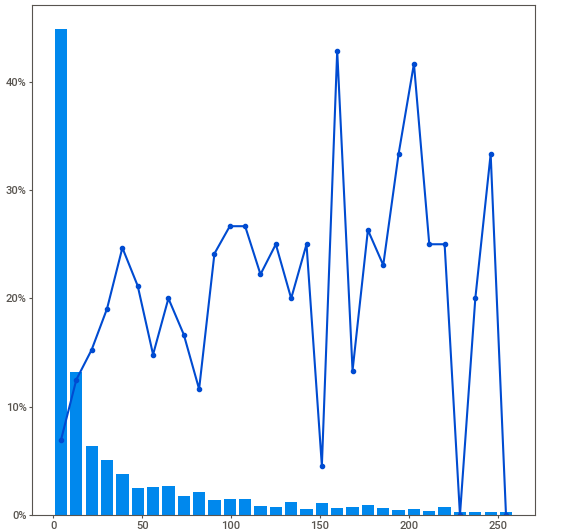
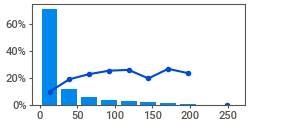
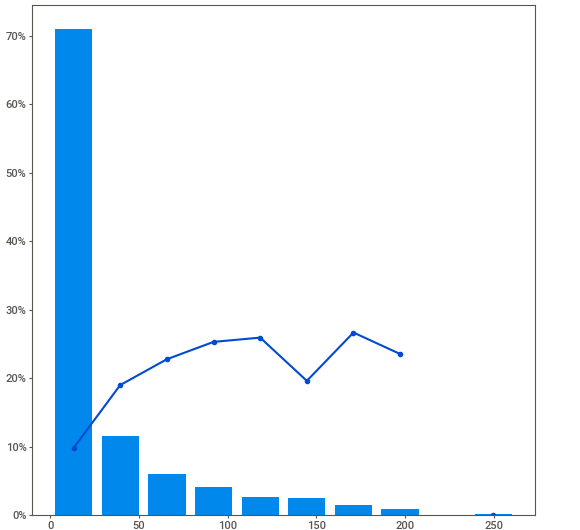
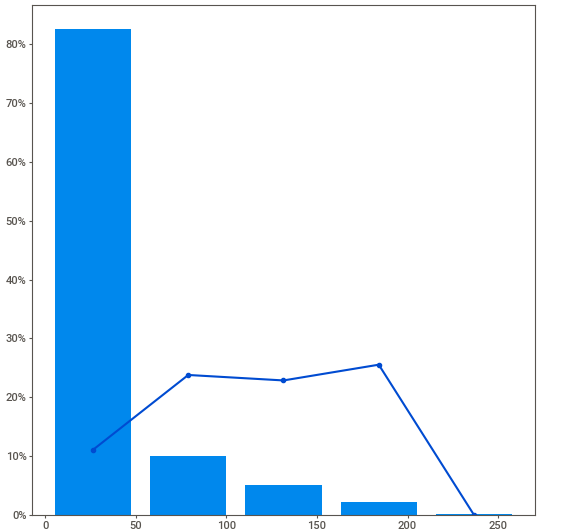
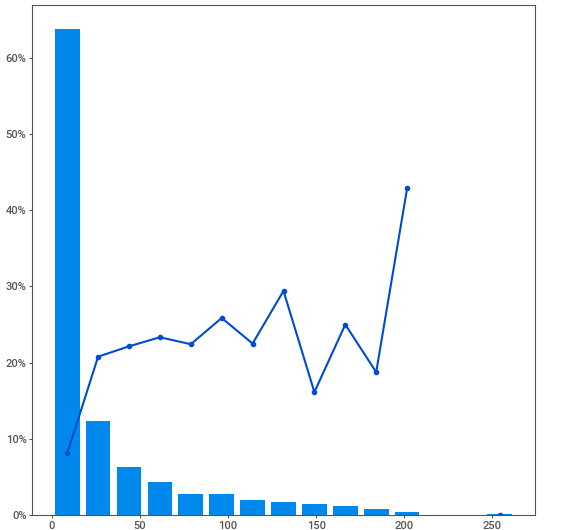
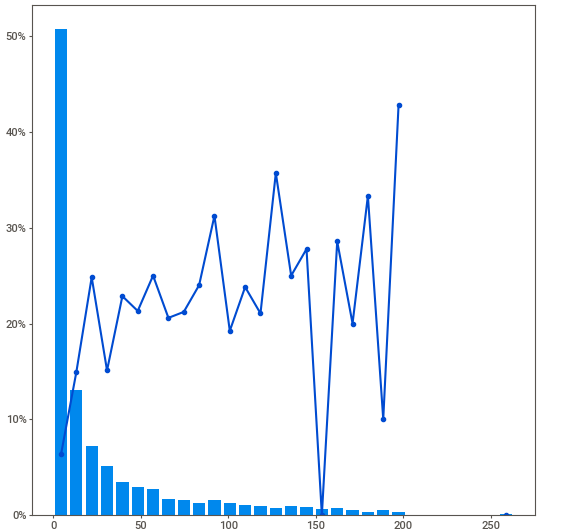
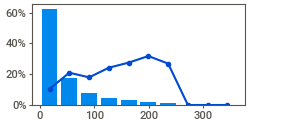
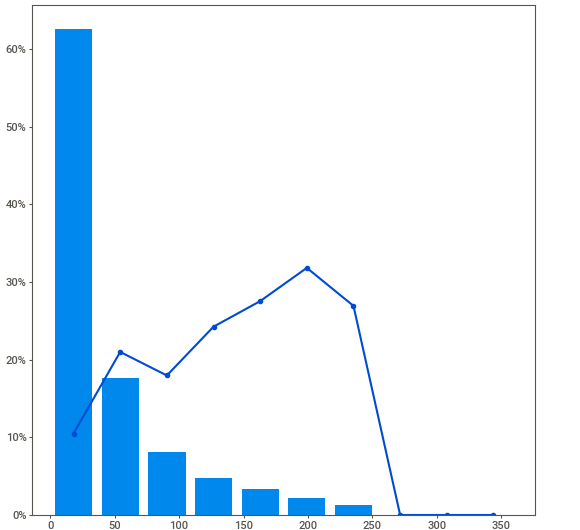
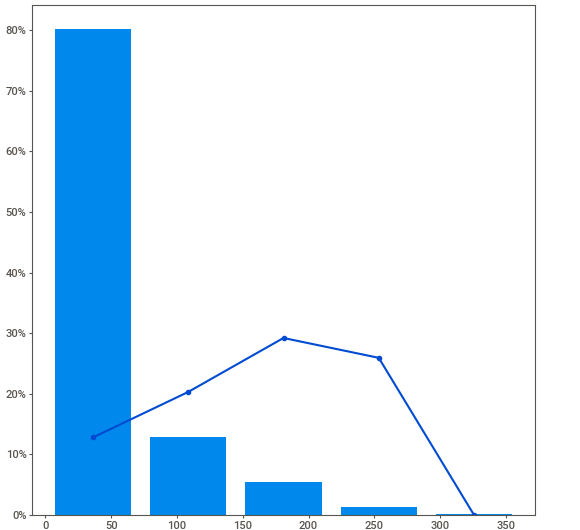
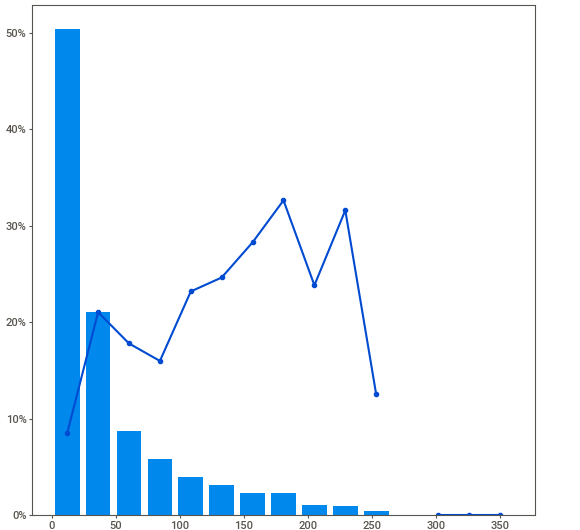
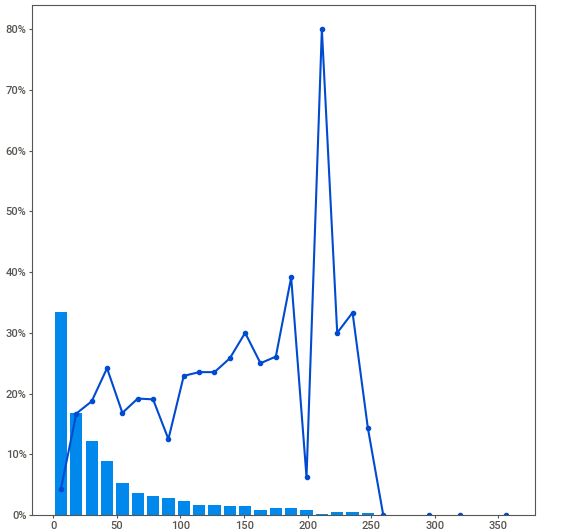
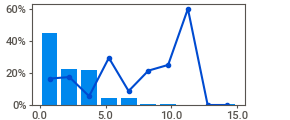
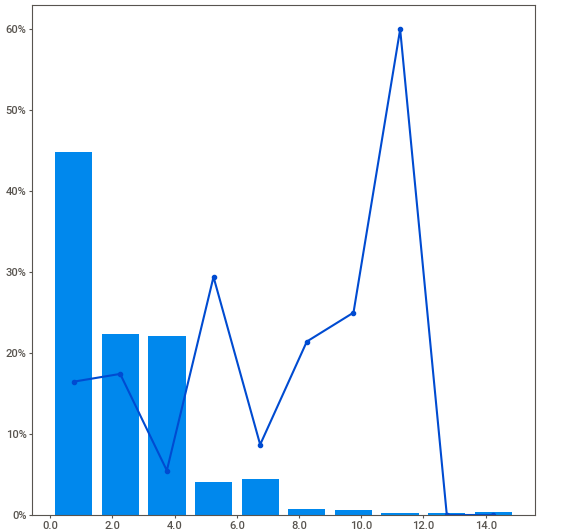
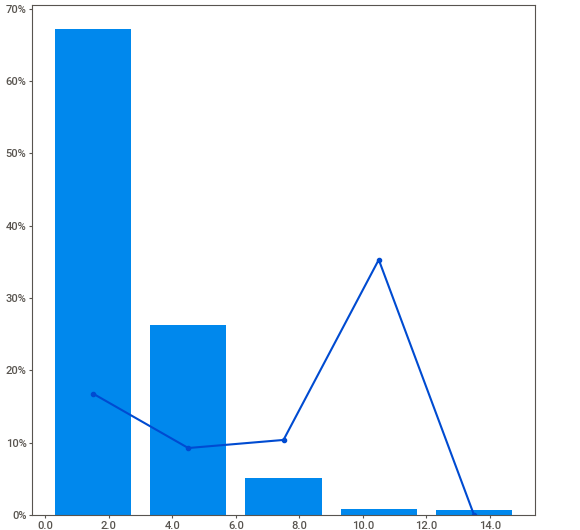
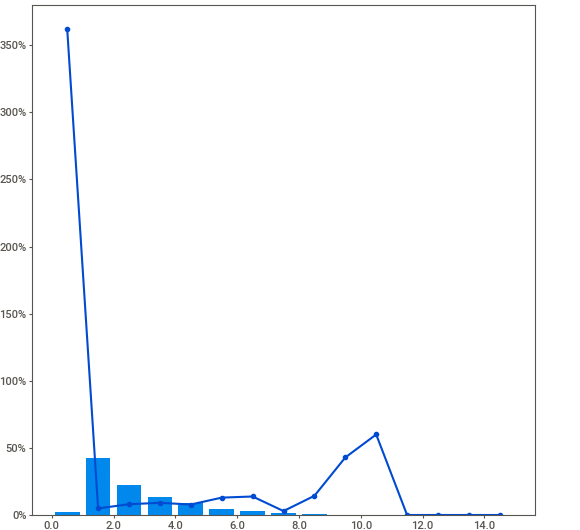
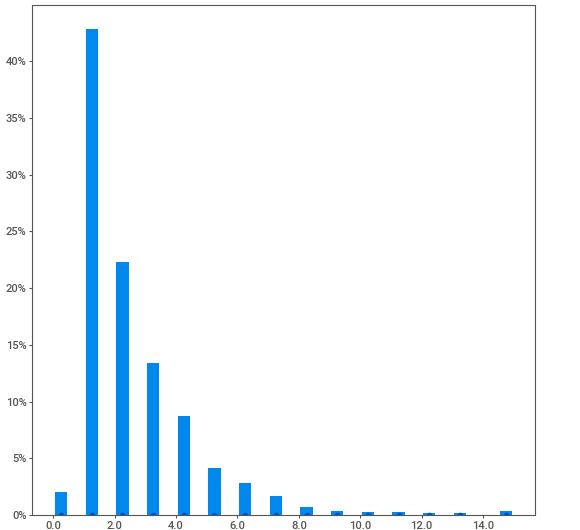
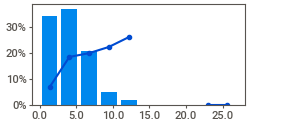
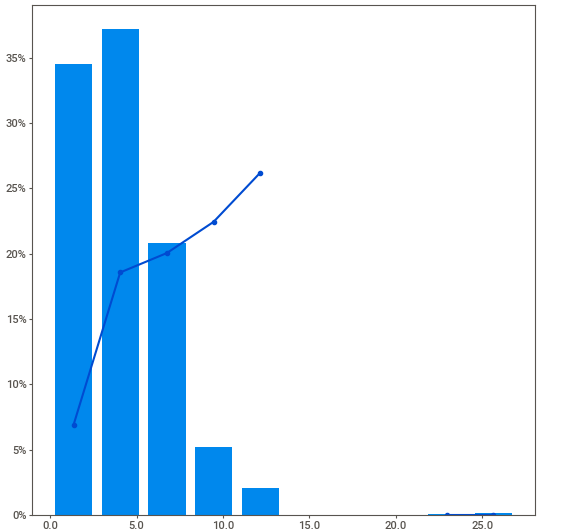
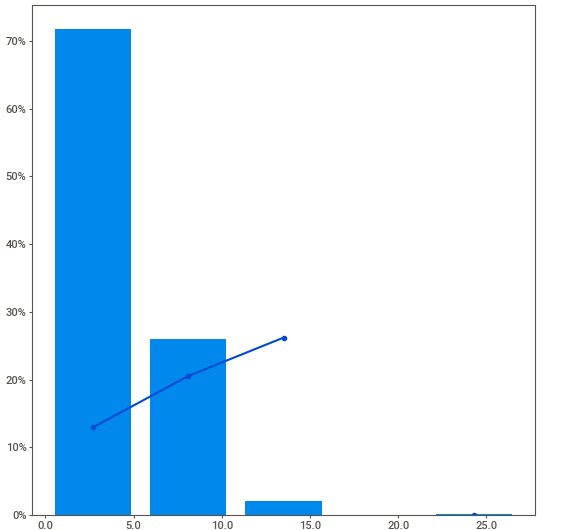
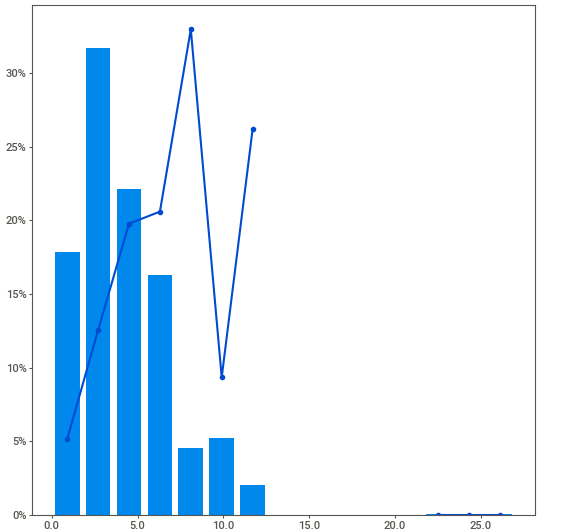
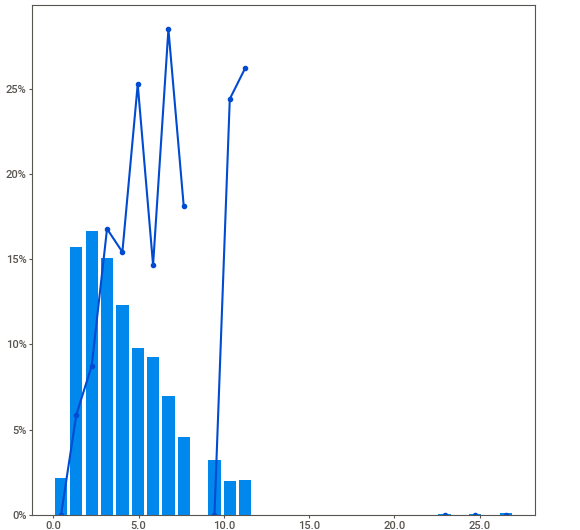
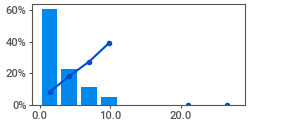
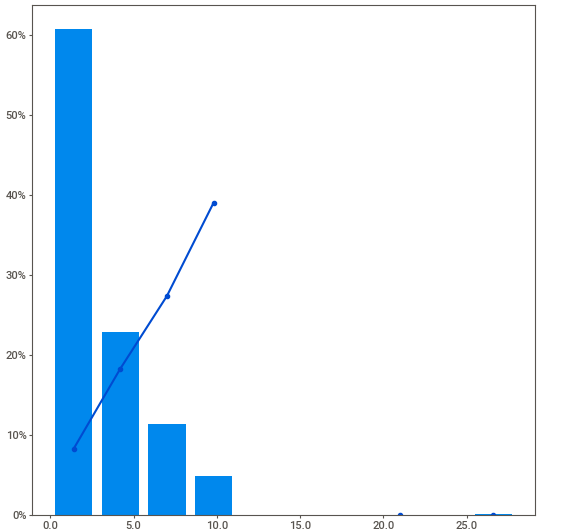
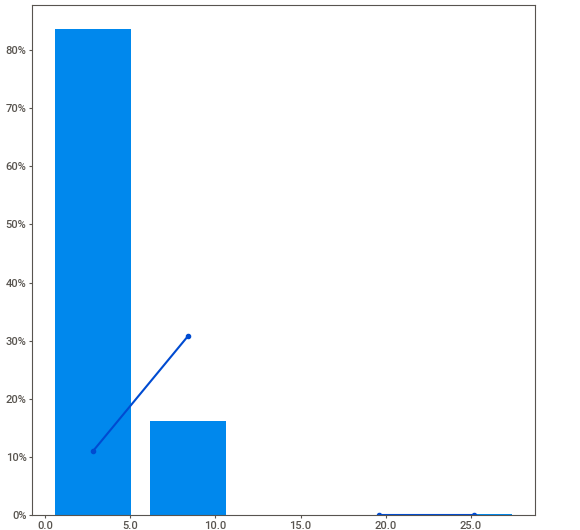
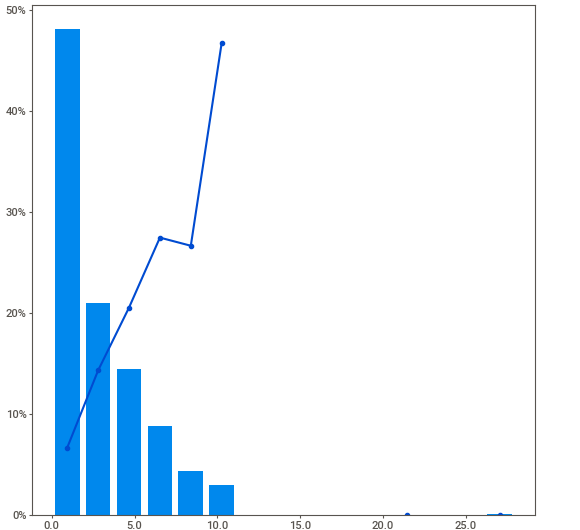
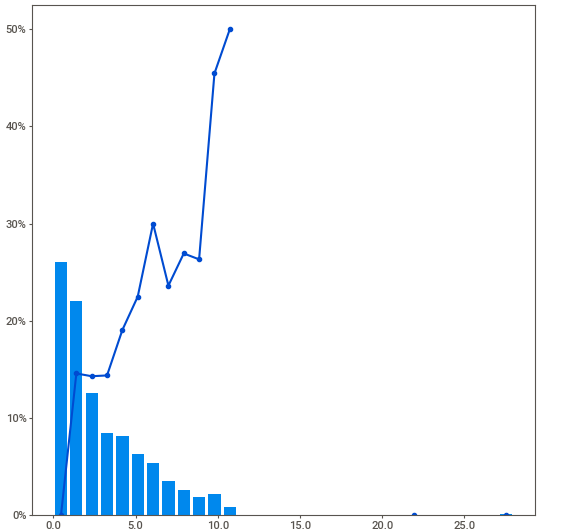
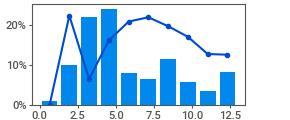
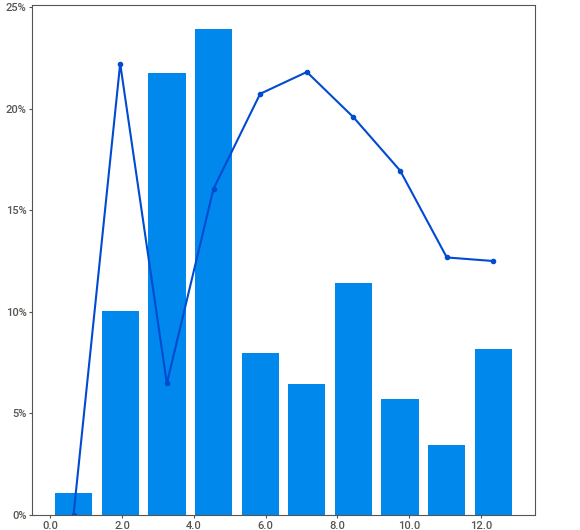
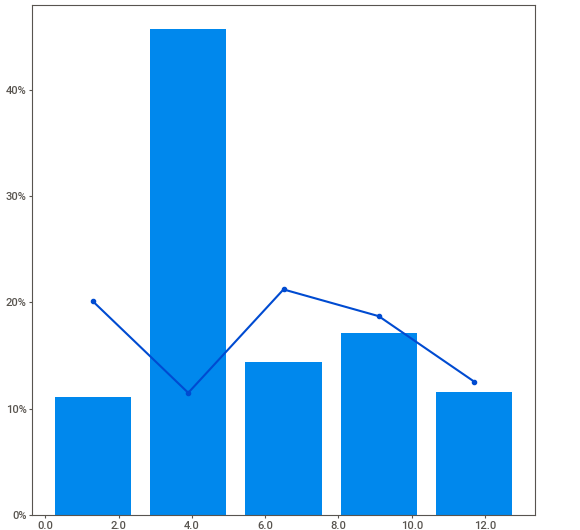
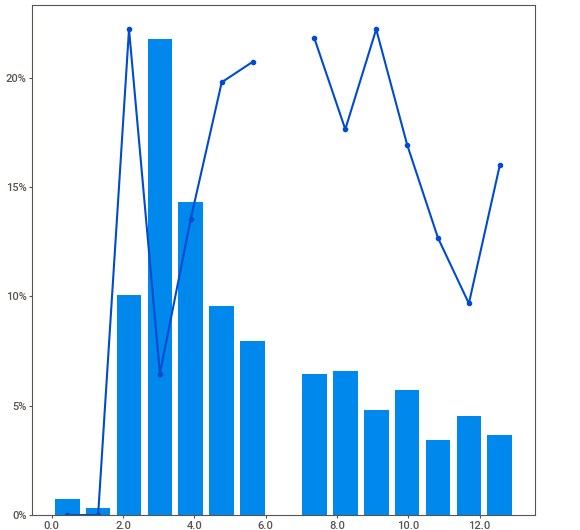
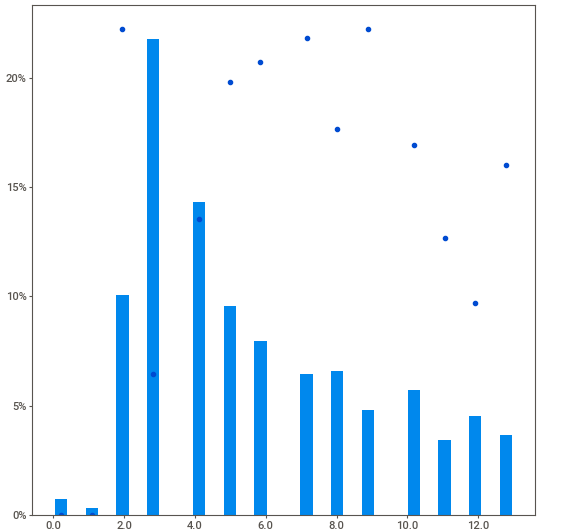
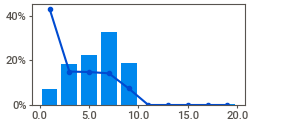
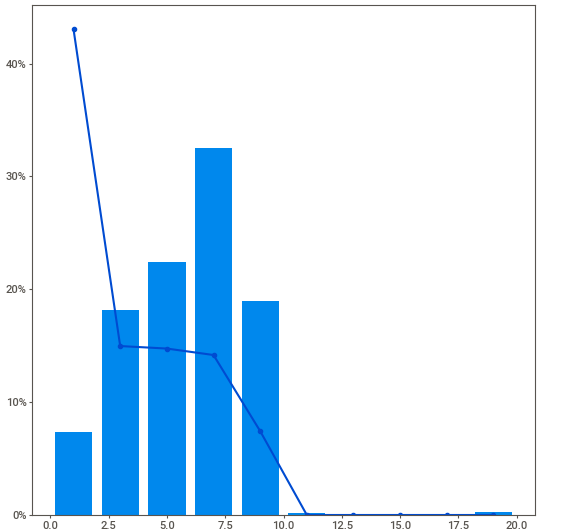
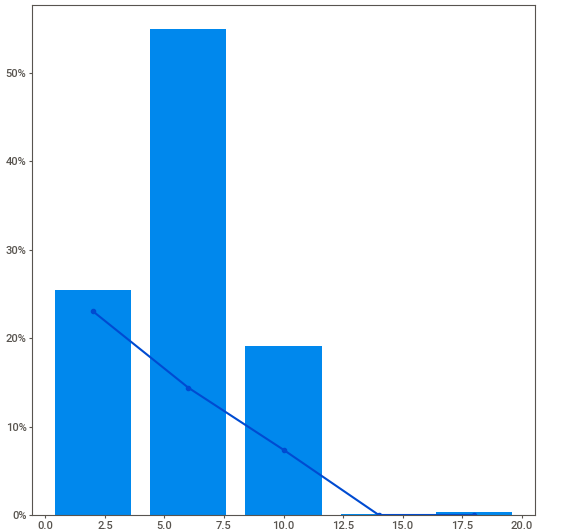
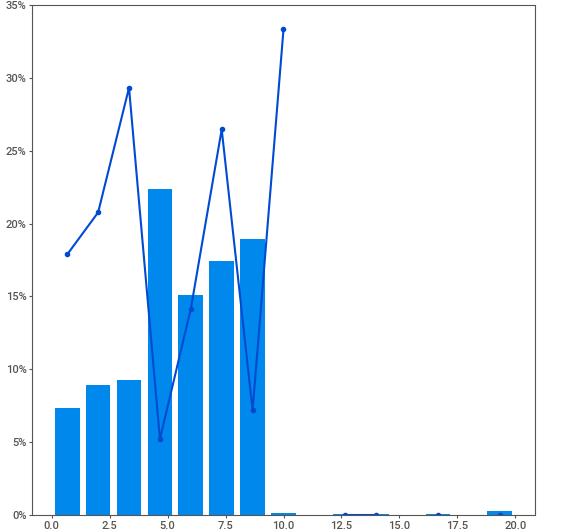
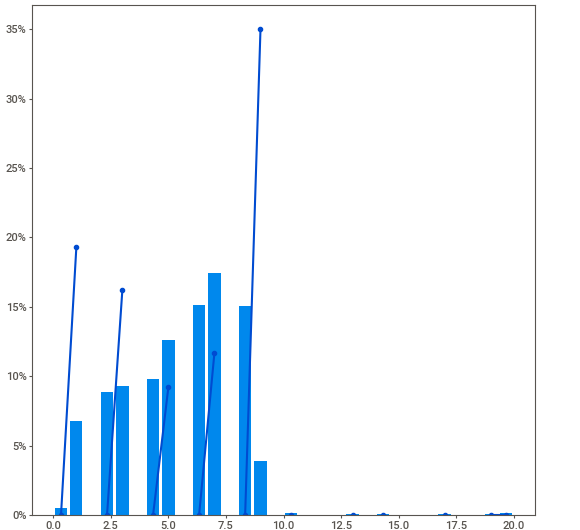
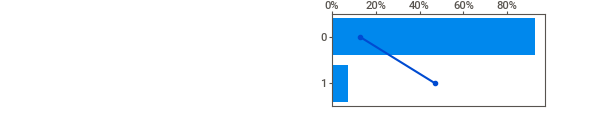
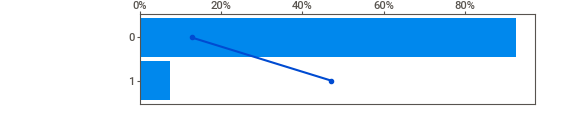
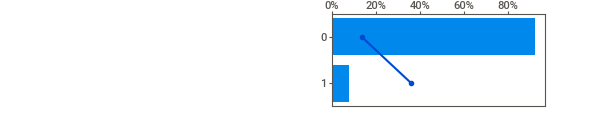
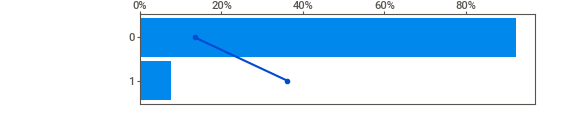
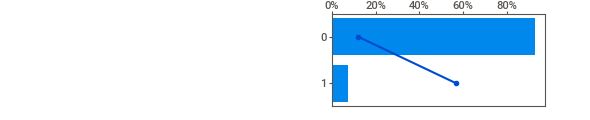
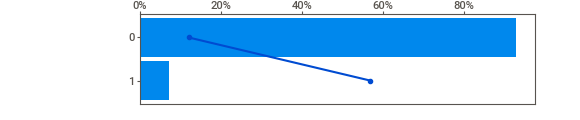
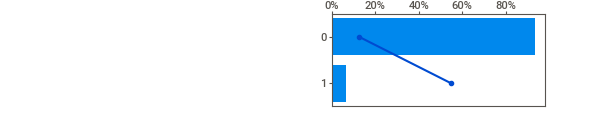
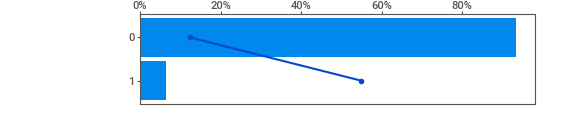
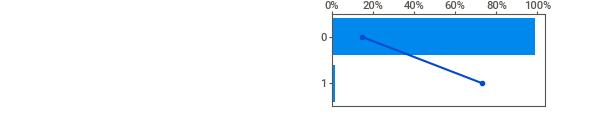
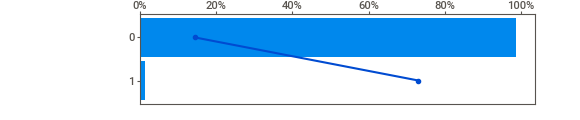
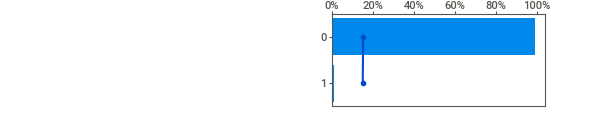
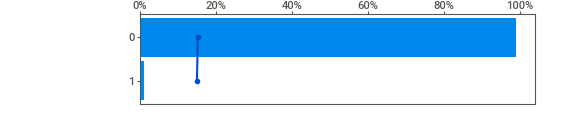
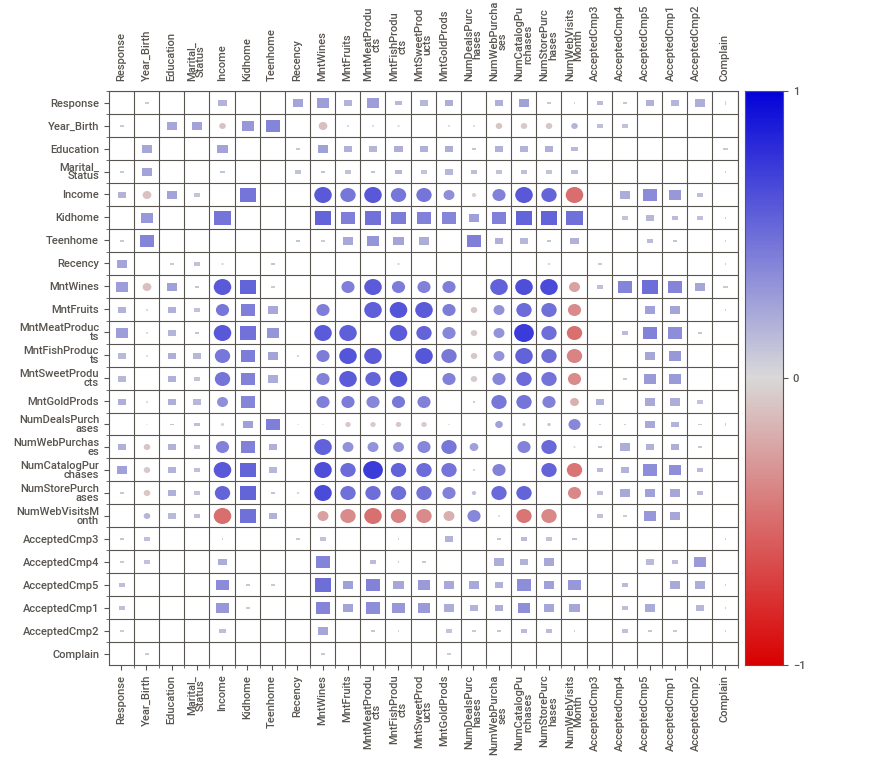
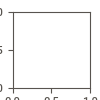

In [5]:
eda = sv.analyze(source = dados, target_feat = 'Response')
eda.show_notebook()

## **Acréscimo de novas informações**

In [7]:
#Idade
dados['ano'] = 2014
dados['Idade'] = dados['ano'] - dados['Year_Birth']
dados = dados.drop(columns=['Year_Birth', 'ano'])

#Somatória das campanhas aceitas
dados['NCmpAceita'] = dados['AcceptedCmp1'] + dados['AcceptedCmp2'] + dados['AcceptedCmp3'] + dados['AcceptedCmp4'] + dados['AcceptedCmp5'] + dados['Response']

#Criação de uma nova coluna para dummyficar os valores depois
dados['AceitouCmp'] = dados['NCmpAceita']

#Somatória do valor da compra de cada cliente e ordenação decrescente
dados ['Faturamento'] = dados['MntFishProducts'] + dados['MntWines'] + dados['MntFruits'] + dados['MntMeatProducts'] + dados['MntSweetProducts'] + dados['MntGoldProds']
dados = dados.sort_values(by = 'Faturamento', ascending = False)


In [8]:
#Faturamento total
dados ['Faturamento'].sum()

1247643

In [9]:
#Colunas criadas para ordenar os clientes e posteriormente separá-los em ABC (de acordo com o faturamento)
dados['Porcentagem'] = dados['Faturamento'] / 1247643 * 100
dados["Soma_acumulada"] = dados["Porcentagem"].cumsum()

#Colunas criadas para calcular a porcentagem de clientes de acordo com a classificação ABC
dados['Pessoas'] = 1
dados['Pessoas%'] = dados['Pessoas'] / 2058 * 100

In [10]:
dados

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Complain,Response,Idade,NCmpAceita,AceitouCmp,Faturamento,Porcentagem,Soma_acumulada,Pessoas,Pessoas%
1479,Master,Single,90638.0,0,0,2014-02-13,29,1156,120,915,...,0,1,23,2,2,2525,0.202382,0.202382,1,0.048591
1133,Master,Single,90638.0,0,0,2014-02-13,29,1156,120,915,...,0,0,23,1,1,2525,0.202382,0.404763,1,0.048591
1411,Graduation,Together,87679.0,0,0,2013-07-27,62,1259,172,815,...,0,1,26,4,4,2524,0.202301,0.607065,1,0.048591
954,Graduation,Married,75759.0,0,0,2013-10-25,46,1394,22,708,...,0,1,45,4,4,2486,0.199256,0.806320,1,0.048591
1014,PhD,Married,69098.0,0,0,2013-02-16,82,1315,22,780,...,0,0,65,0,0,2440,0.195569,1.001889,1,0.048591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,Graduation,Divorced,1730.0,0,0,2014-05-18,65,1,1,3,...,0,0,43,0,0,8,0.000641,99.997996,1,0.048591
1964,PhD,Married,156924.0,0,0,2013-08-29,85,2,1,2,...,0,0,65,0,0,8,0.000641,99.998637,1,0.048591
949,Graduation,Divorced,4861.0,0,0,2014-06-22,20,2,1,1,...,0,0,49,0,0,6,0.000481,99.999118,1,0.048591
640,Graduation,Divorced,153924.0,0,0,2014-02-07,81,1,1,1,...,0,0,39,0,0,6,0.000481,99.999599,1,0.048591


In [11]:
dados['AceitouCmp'].value_counts()

0    1489
1     347
2     133
3      47
4      33
5       9
Name: AceitouCmp, dtype: int64

## **Verificação de dados faltantes**

In [12]:
dados.isnull().sum()

Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
Idade                   0
NCmpAceita              0
AceitouCmp              0
Faturamento             0
Porcentagem             0
Soma_acumulada          0
Pessoas                 0
Pessoas%                0
dtype: int64

In [13]:
media_income = dados.Income.median()
media_income

51533.0

In [14]:
dados.fillna(media_income, inplace = True)
dados.isnull().sum()

Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
Idade                  0
NCmpAceita             0
AceitouCmp             0
Faturamento            0
Porcentagem            0
Soma_acumulada         0
Pessoas                0
Pessoas%               0
dtype: int64

## **Categorização de variáveis**

In [15]:
def aux_dependentes(x):
    if (x['Kidhome'] == 0) and (x['Teenhome'] == 0):
        return 0
    else:
        return 1
    
def dados_dependentes(df):
    df['Dependentes'] = df[['Kidhome', 'Teenhome']].apply(aux_dependentes, axis = 1)   
    return df

dados['Dependentes'] = dados[['Kidhome', 'Teenhome']].apply(aux_dependentes, axis = 1)   

In [16]:
def auxiliar(x):
    if x == 0:
        return 'Não'
    else:
        return 'Sim'

dados['Kidhome_sn'] = dados['Kidhome'].apply(auxiliar)

In [17]:
def auxiliar(x):
    if x == 0:
        return 'Não'
    else:
        return 'Sim'

dados['Teenhome_sn'] = dados['Teenhome'].apply(auxiliar)

In [18]:
def auxiliar(x):
    if x == 0:
        return 'Não'
    else:
        return 'Sim'

dados['Dependentes'] = dados['Dependentes'].apply(auxiliar)

In [19]:
def auxiliar(x):
    if x <= 30:
        return '20-30'
    elif x <= 40:
        return '31-40'
    elif x <= 50:
        return '41-50'
    elif x <= 60:
        return '51-60'
    else:
        return '61+'

dados['Idade'] = dados['Idade'].apply(auxiliar)

In [20]:
dados['Income'].describe()

count      2058.000000
mean      52348.172983
std       25377.757029
min        1730.000000
25%       35701.750000
50%       51533.000000
75%       68242.500000
max      666666.000000
Name: Income, dtype: float64

In [21]:
def auxiliar(x):
    if x <= 36000:
        return '17-36 mil'
    elif x <= 51000:
        return '37-51 mil'
    elif x <= 68000:
        return '50-68 mil'
    else:
        return '69 mil+'

dados['Renda'] = dados['Income'].apply(auxiliar)

In [22]:
def auxiliar(x):
    if x == 0:
        return 'Não'
    else:
        return 'Sim'

dados['AceitouCmp_sn'] = dados['AceitouCmp'].apply(auxiliar)

In [24]:
dados['AceitouCmp'] = dados['AceitouCmp_sn'].map({'Sim': 1,  'Não': 0})

In [26]:
dados

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Faturamento,Porcentagem,Soma_acumulada,Pessoas,Pessoas%,Dependentes,Kidhome_sn,Teenhome_sn,Renda,AceitouCmp_sn
1479,Master,Single,90638.0,0,0,2014-02-13,29,1156,120,915,...,2525,0.202382,0.202382,1,0.048591,Não,Não,Não,69 mil+,Sim
1133,Master,Single,90638.0,0,0,2014-02-13,29,1156,120,915,...,2525,0.202382,0.404763,1,0.048591,Não,Não,Não,69 mil+,Sim
1411,Graduation,Together,87679.0,0,0,2013-07-27,62,1259,172,815,...,2524,0.202301,0.607065,1,0.048591,Não,Não,Não,69 mil+,Sim
954,Graduation,Married,75759.0,0,0,2013-10-25,46,1394,22,708,...,2486,0.199256,0.806320,1,0.048591,Não,Não,Não,69 mil+,Sim
1014,PhD,Married,69098.0,0,0,2013-02-16,82,1315,22,780,...,2440,0.195569,1.001889,1,0.048591,Não,Não,Não,69 mil+,Não
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,Graduation,Divorced,1730.0,0,0,2014-05-18,65,1,1,3,...,8,0.000641,99.997996,1,0.048591,Não,Não,Não,17-36 mil,Não
1964,PhD,Married,156924.0,0,0,2013-08-29,85,2,1,2,...,8,0.000641,99.998637,1,0.048591,Não,Não,Não,69 mil+,Não
949,Graduation,Divorced,4861.0,0,0,2014-06-22,20,2,1,1,...,6,0.000481,99.999118,1,0.048591,Não,Não,Não,17-36 mil,Não
640,Graduation,Divorced,153924.0,0,0,2014-02-07,81,1,1,1,...,6,0.000481,99.999599,1,0.048591,Não,Não,Não,69 mil+,Não


## **Acrescentando mais dados**

In [34]:
#Colunas criadas para calcular a porcentagem de clientes que aceitaram uma ou mais campanhas
dados['Cmp'] = dados['AceitouCmp']
dados['%Cmp'] = dados['Cmp'] / 2058 * 100

In [36]:
dados

,Education,Marital_Status,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Pessoas,Pessoas%,Dependentes,Kidhome_sn,Teenhome_sn,Renda,AceitouCmp_sn,ABC,Cmp,%Cmp
1479,Master,Single,0,0,1156,120,915,94,144,96,...,1,0.048591,Não,Não,Não,69 mil+,Sim,A,1,0.048591
1133,Master,Single,0,0,1156,120,915,94,144,96,...,1,0.048591,Não,Não,Não,69 mil+,Sim,A,1,0.048591
1411,Graduation,Together,0,0,1259,172,815,97,148,33,...,1,0.048591,Não,Não,Não,69 mil+,Sim,A,1,0.048591
954,Graduation,Married,0,0,1394,22,708,89,91,182,...,1,0.048591,Não,Não,Não,69 mil+,Sim,A,1,0.048591
1014,PhD,Married,0,0,1315,22,780,145,0,178,...,1,0.048591,Não,Não,Não,69 mil+,Não,A,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,Graduation,Divorced,0,0,1,1,3,1,1,1,...,1,0.048591,Não,Não,Não,17-36 mil,Não,C,0,0.000000
1964,PhD,Married,0,0,2,1,2,1,1,1,...,1,0.048591,Não,Não,Não,69 mil+,Não,C,0,0.000000
949,Graduation,Divorced,0,0,2,1,1,1,0,1,...,1,0.048591,Não,Não,Não,17-36 mil,Não,C,0,0.000000
640,Graduation,Divorced,0,0,1,1,1,1,1,1,...,1,0.048591,Não,Não,Não,69 mil+,Não,C,0,0.000000


## **Separação dos clientes em ABC de acordo com o faturamento total**
A - 80% do faturamento

B - 15% do faturamento

C - 5% do faturamento 

In [27]:
def auxiliar(x):
    if x <= 80:
        return 'A'
    elif x <= 95:
        return 'B'
    else:
        return 'C'

dados['ABC'] = dados['Soma_acumulada'] .apply(auxiliar)

## **Agrupamento dos dados "Marital_Status"**

In [28]:
dados['Marital_Status'] = dados['Marital_Status'].map({'Married': 'Married',
                                                 'Together': 'Together',
                                                 'Single': 'Single',
                                                 'Divorced': 'Divorced',
                                                 'Widow': 'Widow',
                                                 'Alone': 'Single',
                                                 'Absurd': 'Single',
                                                 'YOLO':'Single'})
dados

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Porcentagem,Soma_acumulada,Pessoas,Pessoas%,Dependentes,Kidhome_sn,Teenhome_sn,Renda,AceitouCmp_sn,ABC
1479,Master,Single,90638.0,0,0,2014-02-13,29,1156,120,915,...,0.202382,0.202382,1,0.048591,Não,Não,Não,69 mil+,Sim,A
1133,Master,Single,90638.0,0,0,2014-02-13,29,1156,120,915,...,0.202382,0.404763,1,0.048591,Não,Não,Não,69 mil+,Sim,A
1411,Graduation,Together,87679.0,0,0,2013-07-27,62,1259,172,815,...,0.202301,0.607065,1,0.048591,Não,Não,Não,69 mil+,Sim,A
954,Graduation,Married,75759.0,0,0,2013-10-25,46,1394,22,708,...,0.199256,0.806320,1,0.048591,Não,Não,Não,69 mil+,Sim,A
1014,PhD,Married,69098.0,0,0,2013-02-16,82,1315,22,780,...,0.195569,1.001889,1,0.048591,Não,Não,Não,69 mil+,Não,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,Graduation,Divorced,1730.0,0,0,2014-05-18,65,1,1,3,...,0.000641,99.997996,1,0.048591,Não,Não,Não,17-36 mil,Não,C
1964,PhD,Married,156924.0,0,0,2013-08-29,85,2,1,2,...,0.000641,99.998637,1,0.048591,Não,Não,Não,69 mil+,Não,C
949,Graduation,Divorced,4861.0,0,0,2014-06-22,20,2,1,1,...,0.000481,99.999118,1,0.048591,Não,Não,Não,17-36 mil,Não,C
640,Graduation,Divorced,153924.0,0,0,2014-02-07,81,1,1,1,...,0.000481,99.999599,1,0.048591,Não,Não,Não,69 mil+,Não,C


## **Exclusão de colunas não utilizadas no df**

In [29]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2058 entries, 1479 to 1438
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2058 non-null   object 
 1   Marital_Status       2058 non-null   object 
 2   Income               2058 non-null   float64
 3   Kidhome              2058 non-null   int64  
 4   Teenhome             2058 non-null   int64  
 5   Dt_Customer          2058 non-null   object 
 6   Recency              2058 non-null   int64  
 7   MntWines             2058 non-null   int64  
 8   MntFruits            2058 non-null   int64  
 9   MntMeatProducts      2058 non-null   int64  
 10  MntFishProducts      2058 non-null   int64  
 11  MntSweetProducts     2058 non-null   int64  
 12  MntGoldProds         2058 non-null   int64  
 13  NumDealsPurchases    2058 non-null   int64  
 14  NumWebPurchases      2058 non-null   int64  
 15  NumCatalogPurchases  2058 non-null 

In [30]:
dados = dados.drop(columns = ['Income', 'Dt_Customer', 'Recency', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
                              'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp5', 'Response', 'Complain'])
dados

,Education,Marital_Status,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Porcentagem,Soma_acumulada,Pessoas,Pessoas%,Dependentes,Kidhome_sn,Teenhome_sn,Renda,AceitouCmp_sn,ABC
1479,Master,Single,0,0,1156,120,915,94,144,96,...,0.202382,0.202382,1,0.048591,Não,Não,Não,69 mil+,Sim,A
1133,Master,Single,0,0,1156,120,915,94,144,96,...,0.202382,0.404763,1,0.048591,Não,Não,Não,69 mil+,Sim,A
1411,Graduation,Together,0,0,1259,172,815,97,148,33,...,0.202301,0.607065,1,0.048591,Não,Não,Não,69 mil+,Sim,A
954,Graduation,Married,0,0,1394,22,708,89,91,182,...,0.199256,0.806320,1,0.048591,Não,Não,Não,69 mil+,Sim,A
1014,PhD,Married,0,0,1315,22,780,145,0,178,...,0.195569,1.001889,1,0.048591,Não,Não,Não,69 mil+,Não,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,Graduation,Divorced,0,0,1,1,3,1,1,1,...,0.000641,99.997996,1,0.048591,Não,Não,Não,17-36 mil,Não,C
1964,PhD,Married,0,0,2,1,2,1,1,1,...,0.000641,99.998637,1,0.048591,Não,Não,Não,69 mil+,Não,C
949,Graduation,Divorced,0,0,2,1,1,1,0,1,...,0.000481,99.999118,1,0.048591,Não,Não,Não,17-36 mil,Não,C
640,Graduation,Divorced,0,0,1,1,1,1,1,1,...,0.000481,99.999599,1,0.048591,Não,Não,Não,69 mil+,Não,C


In [44]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2058 entries, 1479 to 1438
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Education         2058 non-null   object 
 1   Marital_Status    2058 non-null   object 
 2   Kidhome           2058 non-null   int64  
 3   Teenhome          2058 non-null   int64  
 4   MntWines          2058 non-null   int64  
 5   MntFruits         2058 non-null   int64  
 6   MntMeatProducts   2058 non-null   int64  
 7   MntFishProducts   2058 non-null   int64  
 8   MntSweetProducts  2058 non-null   int64  
 9   MntGoldProds      2058 non-null   int64  
 10  Idade             2058 non-null   object 
 11  NCmpAceita        2058 non-null   int64  
 12  AceitouCmp        2058 non-null   int64  
 13  Faturamento       2058 non-null   int64  
 14  Porcentagem       2058 non-null   float64
 15  Soma_acumulada    2058 non-null   float64
 16  Pessoas           2058 non-null   int64

## **Salvando o arquivo em excel**

In [45]:
excel = pd.ExcelWriter('marketing_campaign_python.xlsx', engine='xlsxwriter')
dados.to_excel(excel, sheet_name='marketing_campaign')
excel.save()